In [1]:
%matplotlib notebook
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def read_sqlite(file):
    conn = sqlite3.connect(file)
    try:
        df = pd.read_sql_query('SELECT * FROM result', conn)
    except:
        return None
    finally:
        conn.close()
    return df

In [2]:
vals = [0.1, 0.178, 0.31, 0.562, 1, 1.778, 3.162, 5.623, 10, 17.783, 31.622, 56.234, 100]
dfs = dict(map(lambda x: (x, read_sqlite('results/monetdb_tpch1_flip_heap_{0:g}_results.sqlite'.format(x))), vals))
dfs

{0.1:        iteration  hostname  result  exited  return_code  signaled  term_sig  \
 0              3  rocks204       0       0            0         1         9   
 1              1  rocks204       0       0            0         1         9   
 2              0  rocks204       0       0            0         1         9   
 3              2  rocks204       0       0            0         1         9   
 4              4  rocks204       0       0            0         1         9   
 5              5  rocks204       0       0            0         1         9   
 6              6  rocks204       0       0            0         1         9   
 7              9  rocks204       0       0            0         1         9   
 8              7  rocks204       0       0            0         1         9   
 9              8  rocks204       0       0            0         1         9   
 10            10  rocks204       0       0            0         1         9   
 11            12  rocks204       0

In [3]:
for val in vals:
    dfs[val]['rate'] = val

In [4]:
merged_df = pd.concat(list(dfs.values()))
merged_df

,iteration,hostname,result,exited,return_code,signaled,term_sig,runtime,fault_count,max_heap_size,max_stack_size,rate
0,3,rocks204,0,0,0,1,9,0.719556,2,32718848,135168,0.1
1,1,rocks204,0,0,0,1,9,0.718410,2,32718848,135168,0.1
2,0,rocks204,0,0,0,1,9,0.720006,2,32718848,135168,0.1
3,2,rocks204,0,0,0,1,9,0.721203,1,32718848,135168,0.1
4,4,rocks204,0,0,0,1,9,0.720900,2,32718848,135168,0.1
5,5,rocks204,0,0,0,1,9,0.722432,1,32718848,135168,0.1
6,6,rocks204,0,0,0,1,9,0.720009,2,32718848,135168,0.1
7,9,rocks204,0,0,0,1,9,0.720193,1,32718848,135168,0.1
8,7,rocks204,0,0,0,1,9,0.719789,1,32718848,135168,0.1
9,8,rocks204,0,0,0,1,9,0.720929,2,32718848,135168,0.1


In [26]:
df = merged_df.groupby(['result', 'rate']).size().reset_index(name='counts')
df = df[df['result'] != -1]

for result in range(5):
    for rate in vals:
        if len(df[(df['result'] == result) & (df['rate'] == rate)]) == 0:
            df = df.append({
                'result': result,
                'rate': rate,
                'counts': 0
            }, ignore_index=True)

df['result'] = df['result'].astype(int)
df['counts'] = df['counts'].astype(int)
df.sort_values(['result', 'rate'], inplace=True)

df

,result,rate,counts
0,0,0.100,97493
1,0,0.178,97493
2,0,0.310,97480
3,0,0.562,97482
4,0,1.000,97443
5,0,1.778,97377
6,0,3.162,95832
7,0,5.623,96939
8,0,10.000,96680
9,0,17.783,94856


In [27]:
pivoted = pd.pivot_table(df, values='counts', index='rate', columns='result')
pivoted.columns = ['ok', 'incorrect', 'crash', 'abnormal', 'timeout']
pivoted

,ok,incorrect,crash,abnormal,timeout
rate,,,,,
0.100,97493,1,6,0,0
0.178,97493,0,7,0,0
0.310,97480,4,16,0,0
0.562,97482,3,15,0,0
1.000,97443,14,43,0,0
1.778,97377,17,105,0,0
3.162,95832,24,167,0,0
5.623,96939,46,298,0,2
10.000,96680,67,541,0,2


<IPython.core.display.Javascript object>


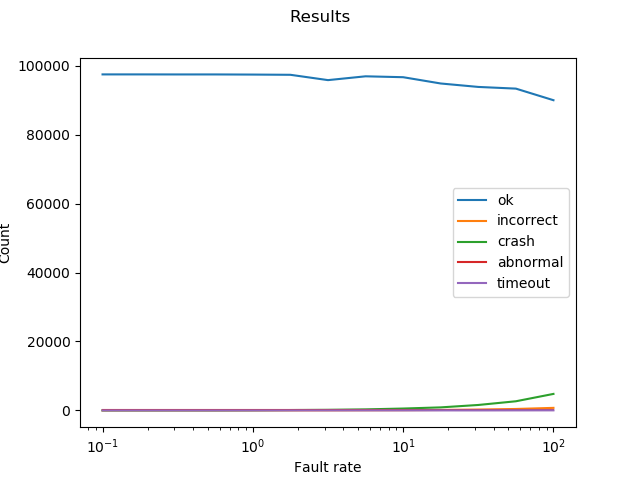

In [9]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['ok'], label='ok')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


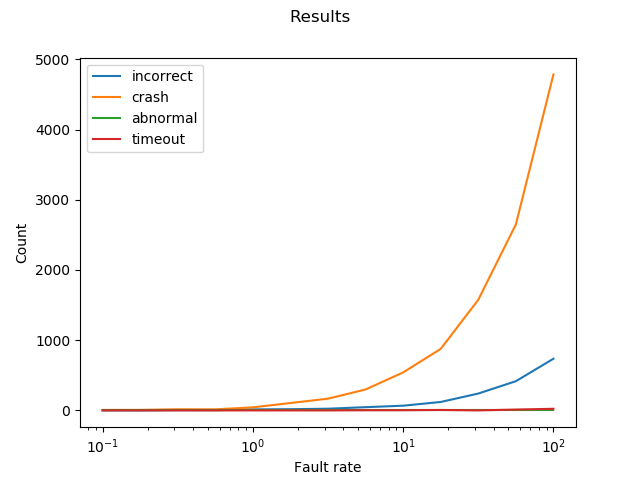

In [10]:
fig = plt.figure()
fig.suptitle('Results')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.plot(vals, pivoted['incorrect'], label='incorrect')
plt.plot(vals, pivoted['crash'], label='crash')
plt.plot(vals, pivoted['abnormal'], label='abnormal')
plt.plot(vals, pivoted['timeout'], label='timeout')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


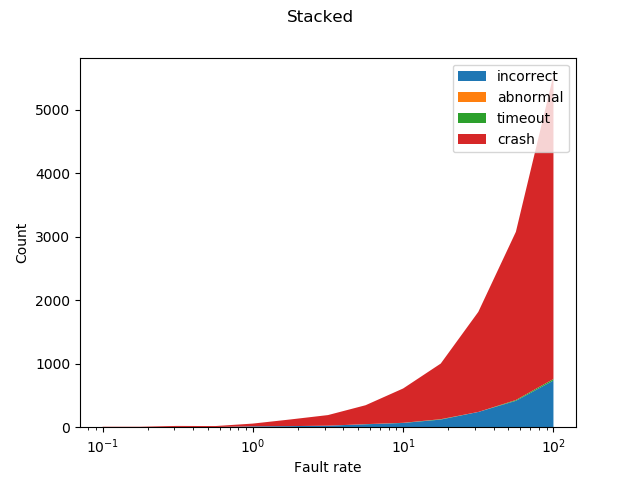

In [12]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              pivoted['crash'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout', 'crash'])
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


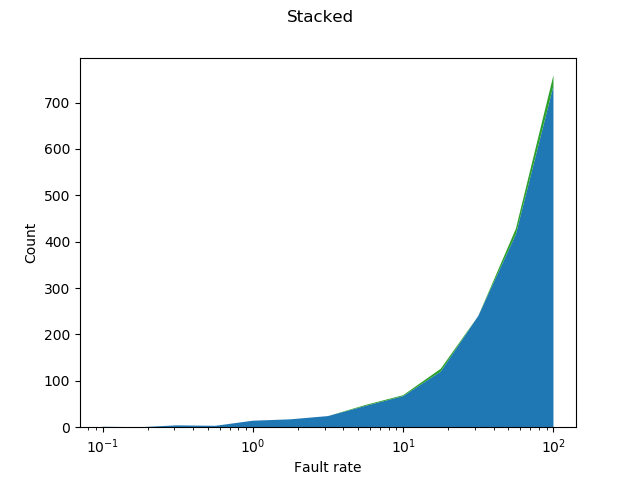

In [14]:
fig = plt.figure()

fig.suptitle('Stacked')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')
plt.stackplot(vals,
              pivoted['incorrect'],
              pivoted['abnormal'],
              pivoted['timeout'],
              baseline='zero',
              labels=['incorrect', 'abnormal', 'timeout'])
plt.show()

<IPython.core.display.Javascript object>


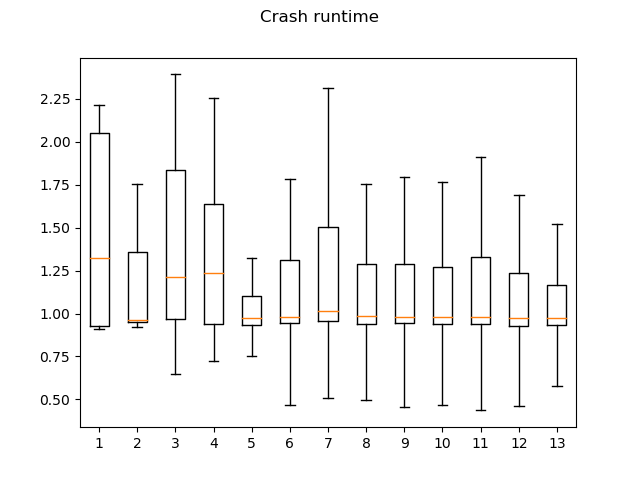

In [15]:
fig = plt.figure()

fig.suptitle('Crash runtime')

df_2 = merged_df[merged_df['result'] == 2]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


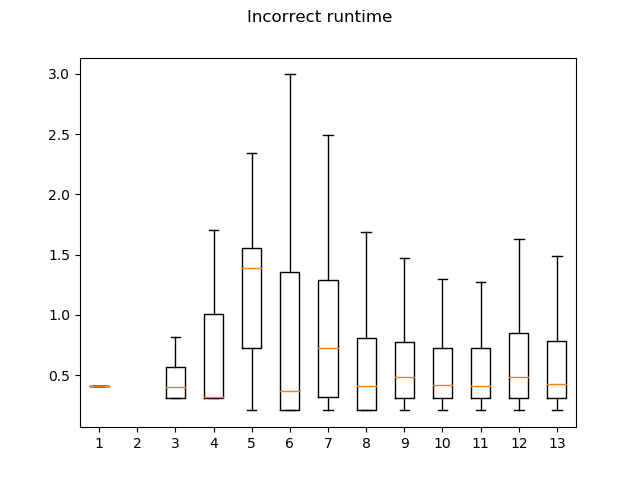

In [16]:
fig = plt.figure()

fig.suptitle('Incorrect runtime')

df_2 = merged_df[merged_df['result'] == 1]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


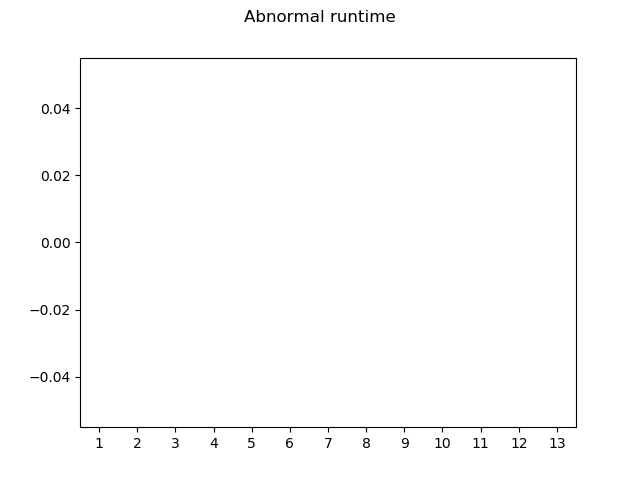

In [17]:
fig = plt.figure()

fig.suptitle('Abnormal runtime')

df_2 = merged_df[merged_df['result'] == 3]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

<IPython.core.display.Javascript object>


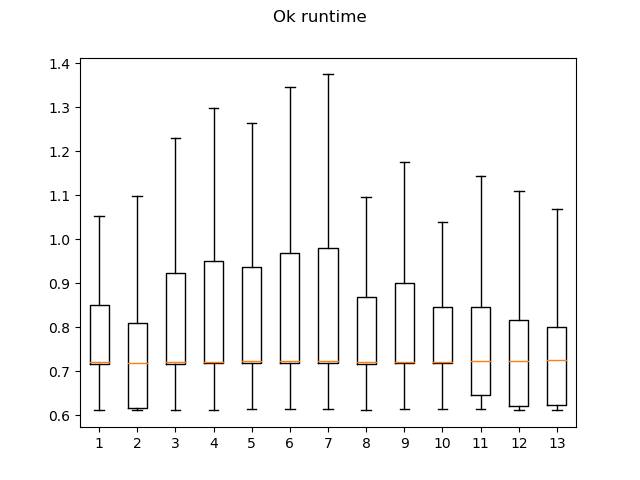

In [18]:
fig = plt.figure()

fig.suptitle('Ok runtime')

df_2 = merged_df[merged_df['result'] == 0]
data_2 = list(map(lambda x: list(df_2[df_2['rate'] == x]['runtime']), vals))

plt.boxplot(data_2, showfliers=False)
plt.show()

In [29]:
crashes = merged_df[merged_df['result'] == 2]
signals = crashes['term_sig'].unique()
crash_count = crashes.groupby(['term_sig', 'rate']).size().reset_index(name='counts')
crash_pivoted = pd.pivot_table(crash_count, values='counts', index='rate', columns='term_sig', fill_value=0)
crash_pivoted

term_sig,4,5,6,7,11
rate,,,,,
0.100,0,0,0,0,6
0.178,0,0,0,0,7
0.310,0,0,0,1,15
0.562,0,0,0,0,15
1.000,0,0,0,4,39
1.778,0,0,1,9,95
3.162,0,0,0,11,156
5.623,0,0,1,26,271
10.000,1,0,0,35,505


<IPython.core.display.Javascript object>


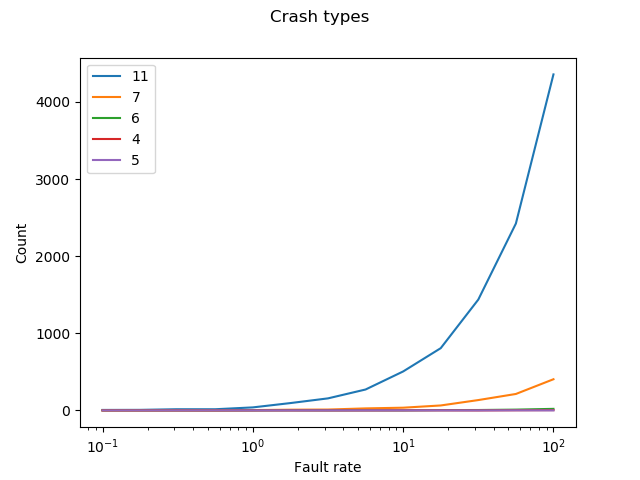

In [30]:
fig = plt.figure()
fig.suptitle('Crash types')
plt.ylabel('Count')
plt.xlabel('Fault rate')
plt.xscale('log')

for signal in signals:
    plt.plot(vals, crash_pivoted[signal], label=str(signal))
    
plt.legend()
plt.show()